Imports

In [59]:
from SSIM_PIL import compare_ssim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

Without tumor present

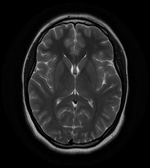

In [60]:
cwd = os.getcwd()
folder_path_withoutTumor= os.path.join(cwd, "data\\brain-tumor-dataset\\no")

images_withoutTumor = []
files_withoutTumor = os.listdir(folder_path_withoutTumor)

for filename in files_withoutTumor:
    image = Image.open(folder_path_withoutTumor + "\\" + filename).convert('L')
    images_withoutTumor.append(image)

# Extract the minimum image width and height
min_width = min([im.size[0] for im in images_withoutTumor])
min_height = min([im.size[1] for im in images_withoutTumor])
# Resize all images_no to min image size in the folder
for i in range(0, len(images_withoutTumor)):
    im = images_withoutTumor[i]
    im = im.resize((min_width, min_height),Image.LANCZOS)
    # Resize images_no
    images_withoutTumor[i]= im

display(images_withoutTumor[0])

Tumor present

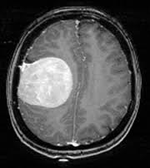

In [61]:
cwd = os.getcwd()
folder_path_withTumor= os.path.join(cwd, "data\\brain-tumor-dataset\\yes")

images_withTumor = []
files_withTumor = os.listdir(folder_path_withTumor)

for filename in files_withTumor:
    image = Image.open(folder_path_withTumor + "\\" + filename).convert('L')
    images_withTumor.append(image)

# Resize all images_yes to min image size in the folder
for i in range(0, len(images_withTumor)):
    im = images_withTumor[i]
    im = im.resize((min_width, min_height),Image.LANCZOS)
    # Resize images_yes
    images_withTumor[i]= im

display(images_withTumor[0])

In [62]:
#  Compare images using CPU-only version
value_no = compare_ssim(images_withoutTumor[0], images_withoutTumor[1], GPU=False)
print(value_no)

0.2677671916960673


In [63]:
value_cross = compare_ssim(images_withoutTumor[0], images_withTumor[0], GPU=False)
print(value_cross)

0.16334605711848474


In [ ]:
# Compare tumor images with image 0 (non-tumor)
ssim_im_0_yes = []
for i in range(1, len(images_withTumor)):
    ssim_im_0_yes.append(compare_ssim(images_withoutTumor[0], images_withTumor[i]))

Text(0, 0.5, 'Count')

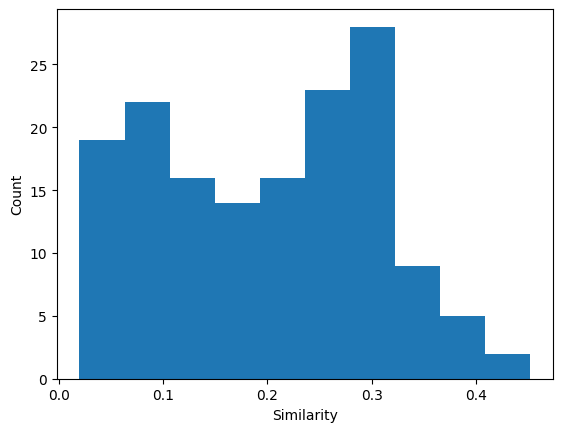

In [67]:
# Visualize distribution of similarity values
counts, bins = np.histogram(ssim_im_0_yes)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel("Similarity")
plt.ylabel("Count")